In [52]:
import numpy as np
from CalcMRate.CalcMRate2 import CalcMRate
import os

def get_signature(cosmic_filepath: str):
    with open(cosmic_filepath) as f:
        lines = f.read().split("\n")[:-1]

    mat = np.array(list(map(lambda x: x.split("\t"), lines)))
    grch38_sig = mat[:, 2][1:].astype(np.float32)

    return grch38_sig

    '''
    print(grch38.shape)
    print(grch38)
    '''

def get_hg38_32vec():
    hg38_32vec = np.repeat(np.load("./hg38-32vec.npy"), 3).astype(np.float32)
    
    return hg38_32vec

def triplicate(vec: np.ndarray):
    return np.repeat(vec, 3)

def check_freq_vecs(gene_name: str):
    for vec in os.listdir('./freq_vecs'):
        if gene_name in vec:
            return True
    return False

def get_prob(signature_fp, gene_name, extract_folder):
    sbs = get_signature(signature_fp)
    hg38_32vec = get_hg38_32vec()

    topcatvec = triplicate(np.load(f"./extracts/{extract_folder}/geneTrimerVecs/{gene_name}_TopCategory_Trimer_Frequency_Vec.npy"))
    rates_sbs = sbs/hg38_32vec

    trimer_freq_vec = None

    if check_freq_vecs(gene_name):
        trimer_freq_vec = np.load(f"./freq_vecs/{gene_name}_trimer_freq_vec.npy")
    else:
        c = CalcMRate(f"./bed_data/{gene_name}_hg38.bed", "./fasta_data/hg38.fa", "./extraction_dir", "extracted_test", np.random.rand(96))
        out = c.get_spec32()
        trinlist, trimer_freq_vec = out

        np.save(f"./freq_vecs/{gene_name}_trimer_freq_vec.npy", trimer_freq_vec)

    numerator = np.dot(rates_sbs, topcatvec)
    denominator = np.dot(rates_sbs, triplicate(trimer_freq_vec))

    prob = numerator / denominator

    return numerator, denominator, prob

signature_fp = "./COSMIC_signatures/v3.3_SBS7d_PROFILE.txt"

gene_name = "BRCA2"
numerator, denominator, prob = get_prob(signature_fp, gene_name, "2024-08-20-00:32:10.907054_extract")
print(numerator, denominator, prob)
    
'''
sbs1 = get_signature("./COSMIC_signatures/v3.3_SBS7d_PROFILE.txt")
sbs5 = get_signature("./COSMIC_signatures/v3.3_SBS5_PROFILE.txt")
hg38_32vec = get_hg38_32vec()

BRCA2_topcatvec = triplicate(np.load("./extracts/2024-08-16-10:39:41.637822_extract/geneTrimerVecs/BRCA2_TopCategory_Trimer_Frequency_Vec.npy"))

mutsig_rates_sbs1 = sbs1/hg38_32vec
mutsig_rates_sbs5 = sbs5/hg38_32vec

sbs1_numerator = np.dot(mutsig_rates_sbs1, BRCA2_topcatvec)
sbs5_numerator = np.dot(mutsig_rates_sbs5, BRCA2_topcatvec)

sbs1_denominator = np.dot(mutsig_rates_sbs1, BRCA2_trimer_freq_vec)
sbs5_denominator = np.dot(mutsig_rates_sbs5, BRCA2_trimer_freq_vec)

BRCA2_sbs1_susceptibility = sbs1_numerator / sbs1_denominator
BRCA2_sbs5_susceptibility = sbs5_numerator / sbs5_denominator

print(BRCA2_sbs1_susceptibility)
print(BRCA2_sbs5_susceptibility)
'''

3.1938670522332594e-08 0.00015970881241013628 0.00019998064001824318


'\nsbs1 = get_signature("./COSMIC_signatures/v3.3_SBS7d_PROFILE.txt")\nsbs5 = get_signature("./COSMIC_signatures/v3.3_SBS5_PROFILE.txt")\nhg38_32vec = get_hg38_32vec()\n\nBRCA2_topcatvec = triplicate(np.load("./extracts/2024-08-16-10:39:41.637822_extract/geneTrimerVecs/BRCA2_TopCategory_Trimer_Frequency_Vec.npy"))\n\nmutsig_rates_sbs1 = sbs1/hg38_32vec\nmutsig_rates_sbs5 = sbs5/hg38_32vec\n\nsbs1_numerator = np.dot(mutsig_rates_sbs1, BRCA2_topcatvec)\nsbs5_numerator = np.dot(mutsig_rates_sbs5, BRCA2_topcatvec)\n\nsbs1_denominator = np.dot(mutsig_rates_sbs1, BRCA2_trimer_freq_vec)\nsbs5_denominator = np.dot(mutsig_rates_sbs5, BRCA2_trimer_freq_vec)\n\nBRCA2_sbs1_susceptibility = sbs1_numerator / sbs1_denominator\nBRCA2_sbs5_susceptibility = sbs5_numerator / sbs5_denominator\n\nprint(BRCA2_sbs1_susceptibility)\nprint(BRCA2_sbs5_susceptibility)\n'

In [53]:
import os
import matplotlib.pyplot as plt

signatures = [sigfile for sigfile in os.listdir("./COSMIC_signatures") if ".txt" in sigfile]
sigs = []
for sig in signatures:
    if "." in sig:
        sigs.append(sig.split("_")[1].split("_")[0])

gene_dir = os.listdir("./VEP_annotations")
genes = []
for gene in gene_dir:
    if "tsv" in gene:
        genes.append(gene.split(".")[0])

prob_mat = np.zeros((len(genes), len(sigs)))
num_mat = np.zeros((len(genes), len(sigs)))
denom_mat = np.zeros((len(genes), len(sigs)))

for i in range(len(genes)):
    for j in range(len(sigs)):
        numerator, denominator, prob = get_prob(f"./COSMIC_signatures/{signatures[j]}", genes[i], "2024-08-20-00:32:10.907054_extract")
        prob_mat[i][j] = prob
        num_mat[i][j] = numerator
        denom_mat[i][j] = denominator

prob_mat

array([[2.55838164e-04, 2.59984060e-04, 8.09189923e-05, 1.19788831e-04,
        2.26175099e-04, 1.01387918e-04, 2.15284906e-04, 2.57024873e-04,
        2.19014435e-04, 2.35377764e-04, 4.57615796e-04, 1.74550346e-04,
        3.69021519e-04, 2.30143533e-04, 9.88980967e-05],
       [2.59889746e-04, 1.74154553e-04, 6.25878059e-05, 1.46624045e-04,
        2.13655510e-04, 7.29496981e-05, 1.83606739e-04, 1.99980640e-04,
        3.68935093e-05, 2.28255787e-04, 8.94521128e-05, 1.88659579e-04,
        1.64065274e-04, 2.09860215e-04, 4.81924962e-05],
       [4.37239986e-05, 7.31208171e-05, 3.48272789e-05, 4.08349526e-05,
        6.53996086e-05, 3.94798839e-05, 5.50321828e-05, 5.08461343e-05,
        3.50393996e-05, 6.35860297e-05, 1.07512444e-04, 6.69776900e-05,
        1.09353959e-04, 4.83531391e-05, 3.67535304e-05],
       [1.33101741e-04, 1.06453276e-04, 4.76307672e-05, 7.11812436e-05,
        1.26150891e-04, 7.27021423e-05, 1.17920461e-04, 1.50115822e-04,
        8.85611443e-05, 1.31449160e-0

In [54]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

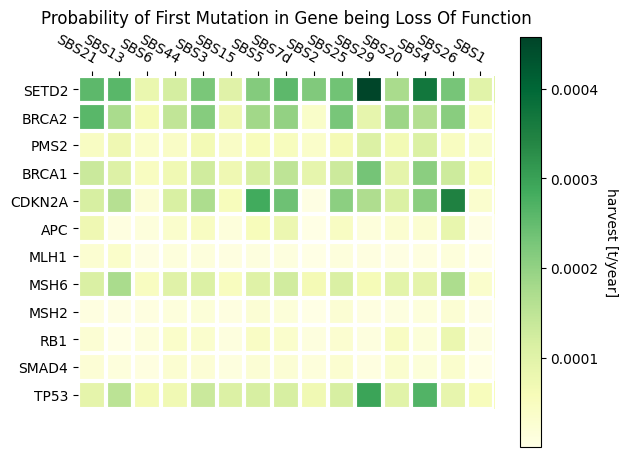

In [56]:
fig, ax = plt.subplots()

im, cbar = heatmap(prob_mat, genes, sigs, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.title("Probability of First Mutation in Gene being Loss Of Function")
fig.tight_layout()
plt.savefig("Probability Heatmap.png")
plt.show()

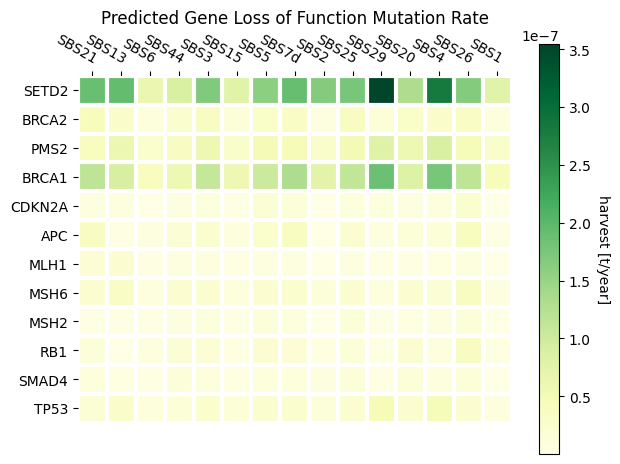

In [57]:
fig, ax = plt.subplots()

im, cbar = heatmap(num_mat, genes, sigs, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.title("Predicted Gene Loss of Function Mutation Rate")
fig.tight_layout()
plt.savefig("Numerator Heatmap.png")
plt.show()

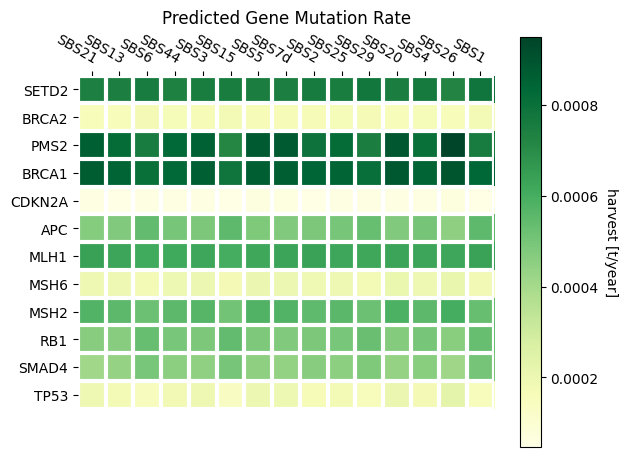

In [58]:
fig, ax = plt.subplots()

im, cbar = heatmap(denom_mat, genes, sigs, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.title("Predicted Gene Mutation Rate")
fig.tight_layout()
plt.savefig("Denominator Heatmap.png")
plt.show()

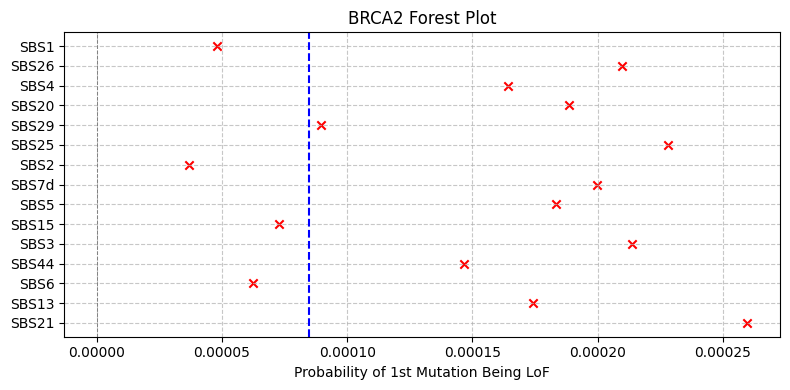

In [51]:
import matplotlib.pyplot as plt

# Example data
studies = sigs
estimates = prob_mat[1, :]
# errors = [0.2, 0.3, 0.1, 0.4]  # Not used in this plot

# Plot
fig, ax = plt.subplots(figsize=(8, 4))

# Scatter plot for point estimates
ax.scatter(estimates, range(len(estimates)), marker='x', color='red')

# Add horizontal lines for each point estimate
for i, estimate in enumerate(estimates):
    ax.plot([estimate, estimate], [i - 0, i + 0], color='blue')

# Customize plot
ax.set_yticks(range(len(studies)))
ax.set_yticklabels(studies)
ax.set_xlabel('Probability of 1st Mutation Being LoF')
ax.set_title(f'{gene_name} Forest Plot')

ax.axvline(x=np.average(prob_mat), color='blue', linestyle='--', linewidth=1.5)

# Add grid lines for better readability
ax.axvline(x=0, color='grey', linestyle='--', linewidth=0.7)
ax.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.savefig("BRCA2_forest_plot.png")
plt.show()
